# Подключаем необходимые библиотеки

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from pandas import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Считываем наши данные

In [2]:
data = pd.read_csv('products.csv', sep='|', error_bad_lines=False)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Рассмотрим отдельный поднабор категории dry_eye

In [3]:
dry_eye = data[data['PRODUCT_CATEGORY_LABEL']=='DRY EYE']

# Рассмотрим его подробнее

In [4]:
dry_eye.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48186 entries, 1673 to 19461110
Data columns (total 11 columns):
WEEK                      48186 non-null object
PLN                       48186 non-null object
PLN_LABEL                 48186 non-null object
PRODUCT_CATEGORY          48186 non-null object
PRODUCT_CATEGORY_LABEL    48186 non-null object
OPSTUDY                   48186 non-null object
OPSTUDY_LABEL             48186 non-null object
ACTUAL                    48186 non-null object
BU                        47915 non-null object
SEG                       48186 non-null object
PROMO                     40513 non-null object
dtypes: object(11)
memory usage: 4.4+ MB


In [5]:
dry_eye.head()

,WEEK,PLN,PLN_LABEL,PRODUCT_CATEGORY,PRODUCT_CATEGORY_LABEL,OPSTUDY,OPSTUDY_LABEL,ACTUAL,BU,SEG,PROMO
1673,1160529,40000415307,REFRESH OPTIVE ADVANCED 10ML,186-002,DRY EYE,186,EYE/EAR,150,Health/Wellness,A,N
1674,1160529,40000415307,REFRESH OPTIVE ADVANCED 10ML,186-002,DRY EYE,186,EYE/EAR,1113,Health/Wellness,C1,N
1675,1160529,40000415307,REFRESH OPTIVE ADVANCED 10ML,186-002,DRY EYE,186,EYE/EAR,295,Health/Wellness,B,N
1676,1160529,40000415307,REFRESH OPTIVE ADVANCED 10ML,186-002,DRY EYE,186,EYE/EAR,15,Health/Wellness,NoSegment-C,N
2474,1160529,40000684179,THERA TEARS LUB EYE DROPS 15ML,186-002,DRY EYE,186,EYE/EAR,153,Health/Wellness,A,N


## Удаляем ненужные столбцы (признак BU можем удалить т.к. все наши данные итак принадлежат BU == 'Health/Wellness', аналогичная логика рассуждений и для других удаляемых признаков, ведь все они имеют одинаковые значения)

In [6]:
dry_eye.drop(['BU', 'PRODUCT_CATEGORY_LABEL', 'PRODUCT_CATEGORY', 'OPSTUDY', 'OPSTUDY_LABEL'], axis=1, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Преобразуем признаки в необходимые типы

In [7]:
dry_eye['WEEK'] = dry_eye['WEEK'].apply(lambda x: str(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
dry_eye['PLN'] = dry_eye['PLN'].apply(lambda x: str(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
dry_eye['PLN_LABEL'] = dry_eye['PLN_LABEL'].apply(lambda x: str(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
dry_eye['ACTUAL'] = dry_eye['ACTUAL'].apply(lambda x: float(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
dry_eye['SEG'] = dry_eye['SEG'].apply(lambda x: str(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
dry_eye['PROMO'] = dry_eye['PROMO'].apply(lambda x: str(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Преобразуем признак WEEK в datetime и создадим три новых колонки: YEAR, MONTH, DAY для того, чтобы, например, посмотреть как менялись продажи товара каждый месяц в разные года

### Колонка WEEK имеет неподходящий вид для перевода в тип datetime, поэтому напишем функцию, чтобы немного преобразовать данные в этой колонке

In [13]:
def date_divide(x):
    x=x[1:]
    x='20' + x
    x=x[:4] + '-' + x[4:]
    x=x[:7] + '-' + x[7:]
    return x

In [14]:
dry_eye['WEEK'] = dry_eye['WEEK'].apply(lambda x: date_divide(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Переводим данные в дату 

In [15]:
dry_eye['WEEK'] = pd.to_datetime(dry_eye['WEEK'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Создаем новые три колонки с годом, месяцем и днем (неделей) 

In [16]:
dry_eye['YEAR'] = [d.year for d in dry_eye['WEEK']]
dry_eye['MONTH'] = [d.month for d in dry_eye['WEEK']]
dry_eye['DAY'] = [d.day for d in dry_eye['WEEK']]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

## Заменим значения признака SEG на числовые 

### Создаем словарь, дге каждому строковому значению признака соответствует число 

In [17]:
seg_dic = {'A':0, 'NoSegmen-A':1, 'B':2, 'NoSegment-B':3, 'C1':4, 'C2':5, 'C3':6, 'C4':7, 'NoSegment-C':8, 'NoBuisnessUnit':9}

In [18]:
dry_eye['SEG'] = dry_eye['SEG'].replace(seg_dic)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Если в датасете имеются отрицательные значения продаж, то заменим их на нулевые

In [19]:
def replace_negative(x):
    if x<0:
        return 0
    else:
        return x

In [20]:
dry_eye['ACTUAL'] = dry_eye['ACTUAL'].apply(lambda x: replace_negative(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Заменим значения PROMO 'Y', 'N' на 1, 0

In [21]:
promo_dic = {'Y':1, 'N':0}

In [22]:
dry_eye['PROMO'] = dry_eye['PROMO'].replace(promo_dic)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Взглянем на получившейся набор после преобразований 

In [23]:
dry_eye.head()

,WEEK,PLN,PLN_LABEL,ACTUAL,SEG,PROMO,YEAR,MONTH,DAY
1673,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,150.0,0,0,2016,5,29
1674,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,1113.0,4,0,2016,5,29
1675,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,295.0,2,0,2016,5,29
1676,2016-05-29,40000415307,REFRESH OPTIVE ADVANCED 10ML,15.0,8,0,2016,5,29
2474,2016-05-29,40000684179,THERA TEARS LUB EYE DROPS 15ML,153.0,0,0,2016,5,29


## Выведем гистограму продаж

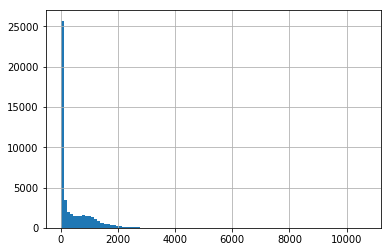

In [24]:
dry_eye['ACTUAL'].hist(bins=100);

### Видно из гистограммы, что продажи не распределены по нормальному закону 

## Диаграмма количества продаж в каждый месяц по годам

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


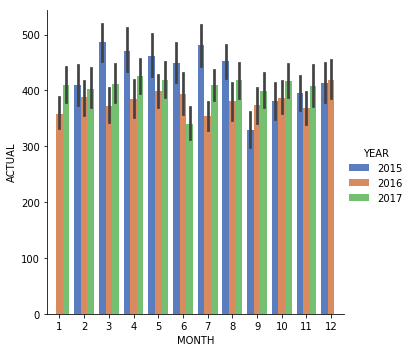

In [25]:
sns.catplot(x='MONTH', y='ACTUAL', hue='YEAR', data=dry_eye, kind='bar', palette='muted');

### Из графика продаж в принципе видно, что у данной категории нет никаких сезонных компонент

## Рассмотрим подробнее и попытаемся спрогнозировать продажи самого популярного продукта данной категории

In [26]:
dry_eye['PLN_LABEL'].value_counts()

BLINK GEL TEAR LUB EYE DROPS.34OZ    942
BLINK TEARS LUBRICATING DRPS .5OZ    935
BLINK TEARS LUBRICATING DROPS 1OZ    898
WALG ARTIFICIAL TEAR LBRCNT .5OZ     876
B&L SOOTHE LUB EYE DRPS .02OZ 28S    849
VISINE TEARS FOR DRY EYES    .5OZ    838
VISINE TEARS L/LST RLF DRYEYE.5OZ    826
SOOTHE HYDRATION DRY EYE DROP.5OZ    823
WALG LUB E DRP SNGL USE .01OZ 30S    819
SYSTANE ULT HIGH PERFORMANC .33OZ    797
WALG SODIUM CHLR OPTH ONT 5%.13OZ    785
SYSTANE LUB EYE DRP          .5OZ    782
B&L SOOTHE XP                15ML    779
SYSTANE BLNC LBRCNT EYE DROP.33OZ    776
SYSTANE PM LUBE EYE OINTMENT.12OZ    763
SYSTANE ULTRA            .33OZ 2S    753
WALG LUB E DRP SNGL USE .01OZ 70S    751
SYSTANE BALANCE EYE DROP .33OZ 2S    750
SIMILASAN E/DROP D/EYE 30014.33OZ    747
SIMILASAN CMPLT E RLF DRPS .33OZ     741
WALGREENS MURO 128 DROPS    .500Z    736
WALG ULT LUB EYEDRP VIAL .01OZ25S    726
SYSTANE LUB EYE DRP          30ML    721
SYSTANE ULTRA POCKET PACK.14OZ 2S    719
SYSTANE GEL DROP

In [27]:
first_item = dry_eye[dry_eye['PLN_LABEL']=='BLINK GEL TEAR LUB EYE DROPS.34OZ']

## Можем удалить колонки 'PLN' и 'PLN_LABEL', ведь мы уже определились с конкретным товаром 

In [28]:
first_item.drop(['PLN_LABEL', 'PLN'], axis=1, inplace=True)

In [30]:
first_item['WEEK'].value_counts()

2017-07-09    14
2017-05-28     8
2016-09-11     8
2016-10-09     8
2017-05-14     8
2017-03-12     8
2016-07-24     8
2016-11-06     8
2015-12-06     8
2016-04-17     8
2015-09-27     8
2017-02-12     8
2016-06-26     8
2015-11-08     8
2015-10-25     8
2016-06-12     8
2017-01-29     8
2017-06-04     8
2015-11-22     8
2016-07-10     8
2017-02-26     8
2017-04-30     8
2016-01-24     8
2017-03-26     8
2015-11-01     8
2016-11-13     8
2015-09-06     8
2016-04-24     8
2017-07-30     8
2015-10-04     8
              ..
2015-07-26     4
2015-08-23     4
2016-05-08     4
2015-03-01     4
2015-03-29     4
2015-04-26     4
2017-11-05     4
2015-05-24     4
2015-06-21     4
2016-02-07     4
2015-04-05     4
2017-08-20     4
2016-03-27     4
2017-01-01     4
2015-02-15     4
2016-05-22     4
2017-01-08     4
2015-03-15     4
2015-04-12     4
2015-05-10     4
2017-11-19     4
2015-06-07     4
2015-07-05     4
2016-02-21     4
2015-08-02     4
2016-03-20     4
2015-08-30     4
2015-02-08    

### Как видно выше недели повторяютя, сделаем так, чтобы на каждую конкретную неделю была только одна запись, для этого сложим все значения продаж для каждых повторяющихся недель. Также если хотя бы в одной из повторяющихся недель товар был на акции, то считаем, что и в "суммированной" недели он тоже будет на акции

In [31]:
weeks = np.unique(first_item['WEEK'].values)
sums = []
promos = []
indexes = first_item.index

In [32]:
for w in weeks:
    s = 0
    promo = 0
    for i in indexes:
        if first_item.at[i, 'WEEK']==w:
            s=s+first_item.at[i, 'ACTUAL']
            if first_item.at[i, 'PROMO']==1:
                promo = 1
    sums.append(s)
    promos.append(promo)

In [33]:
first_item1 = pd.DataFrame({'WEEK': weeks, 'ACTUAL': sums, 'PROMO': promos})

# Загрузим сразу данные на будующий год, для которого необходимо сделать прогноз 

In [34]:
future = pd.read_csv('future.csv', sep='|', error_bad_lines=False)

In [35]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7199527 entries, 0 to 7199526
Data columns (total 4 columns):
1171126        int64
40000980460    int64
B              object
N              object
dtypes: int64(2), object(2)
memory usage: 219.7+ MB


In [36]:
future.head()

,1171126,40000980460,B,N
0,1171126,40000980460,NoSegment-C,N
1,1171126,40000980460,C4,N
2,1171126,40000223091,NoSegment-C,N
3,1171126,40000223091,C4,N
4,1171126,40000755059,A,N


## Переименуем столбцы

In [37]:
future.rename(index=str, columns={'1171126':'WEEK', '40000980460':'PLN', 'B':'SEG', 'N':'PROMO'}, inplace=True)

## Приведем данные в необходимые нам типы 

In [38]:
future['WEEK'] = future['WEEK'].apply(lambda x: str(x))

In [39]:
future['PLN'] = future['PLN'].apply(lambda x: str(x))

In [40]:
future['SEG'] = future['SEG'].apply(lambda x: str(x))

In [41]:
future['PROMO'] = future['PROMO'].apply(lambda x: str(x))

## Переведем WEEK в datetime 

In [42]:
future['WEEK'] = future['WEEK'].apply(lambda x: date_divide(x))

In [43]:
future['WEEK'] = pd.to_datetime(future['WEEK'])

## Заменим данные SEG на числовые 

In [44]:
future['SEG'] = future['SEG'].replace(seg_dic)

## Сделаем замену и для PROMO 

In [45]:
future['PROMO'] = future['PROMO'].replace(promo_dic)

In [46]:
future.head()

,WEEK,PLN,SEG,PROMO
0,2017-11-26,40000980460,8,0
1,2017-11-26,40000980460,7,0
2,2017-11-26,40000223091,8,0
3,2017-11-26,40000223091,7,0
4,2017-11-26,40000755059,0,0


## Возьмем отдуда необходимый нам продукт 

In [48]:
fut_first_prod = future[future['PLN']=='40000529197']

In [49]:
fut_first_prod.drop(['SEG', 'PLN'], axis=1, inplace=True)

In [50]:
fut_first_prod.head()

,WEEK,PROMO
91117,2017-11-26,0
91118,2017-11-26,0
91119,2017-11-26,0
91120,2017-11-26,0
144951,2017-12-03,1


### Как и в основном нашем наборе недели повторяются

In [51]:
fut_first_prod['PROMO'].value_counts()

0    173
1    163
Name: PROMO, dtype: int64

In [52]:
weeks = np.unique(fut_first_prod['WEEK'].values)
promos = []
indexes = fut_first_prod.index

In [53]:
for w in weeks:
    promo = 0
    for i in indexes:
        if fut_first_prod.at[i, 'WEEK']==w:
            if fut_first_prod.at[i, 'PROMO']==1:
                promo = 1
    promos.append(promo)

In [54]:
fut_first_prod1 = pd.DataFrame({'WEEK': weeks, 'PROMO': promos})

In [55]:
fut_first_prod1.head()

,PROMO,WEEK
0,0,2017-11-26
1,1,2017-12-03
2,1,2017-12-10
3,1,2017-12-17
4,1,2017-12-24


## Анализ временных рядов 

### Перед тем, как строить какие-либо графики и проводить анализ, необходимо нормализировать наши данные, чтобы удобнее на одном графике было увидеть, например, зависимость промо-акций и продаж 

In [56]:
df1 = first_item1.copy()

### Устанавливаем индексацию по неделям 

In [57]:
df1.set_index('WEEK', inplace=True)

### Проводим нормализацию 

In [58]:
scaler = MinMaxScaler()

In [59]:
scaler.fit(df1)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [60]:
df1_values = scaler.transform(df1)

In [62]:
df1 = pd.DataFrame({'WEEK': first_item1['WEEK'].values, 'ACTUAL': df1_values[:,0], 'PROMO': df1_values[:,1]})

In [63]:
df1.set_index('WEEK', inplace=True)

### Построим график продаж  

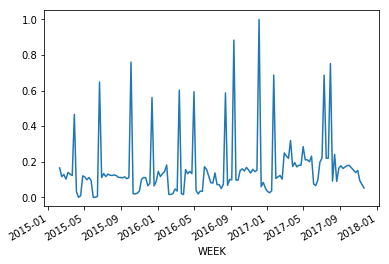

In [65]:
df1['ACTUAL'].plot();

### Как видно из графика, есть большое число каких-то колебаний (возможно связанных с промо-акциями) 

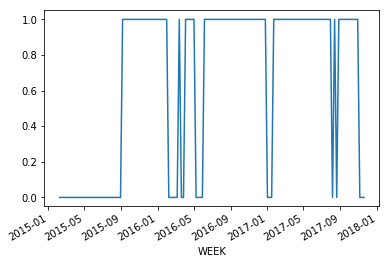

In [66]:
df1['PROMO'].plot();

### Чтобы сгладить краткосрочные колебания и выявить тенденции построим скользящую среднюю

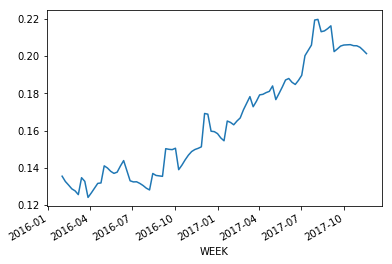

In [74]:
df1['ACTUAL'].rolling(52).mean().plot();

### Как видно из графика, имеется тенденция к росту продаж данного продукта 

### Построим разности первого порядка для промо и продаж 

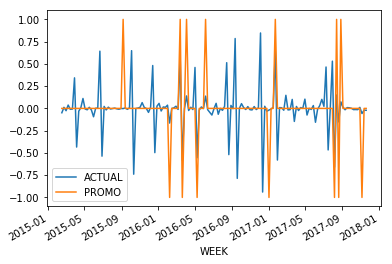

In [77]:
df1.diff().plot();

### Как видно из графика иногда резкие скачки в продажах сопровождаются наличием промо-акций, однако это не всегда так. Иногда присутствуют скачки в продажах, но акций в это время не было, возможно это вызвано какими-либо другими событиями и у нас не достаточно информации, чтобы это узнать 

### Теперь построим график автокорреляции 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


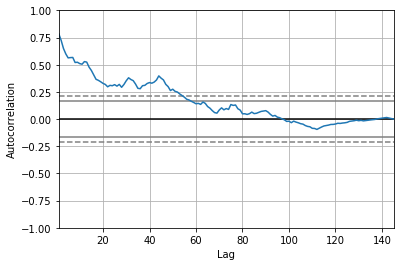

In [79]:
autocorrelation_plot(df1);

### Из графика видно, что существует положительная корреляция с первыми ~90 лагами, для параметра AR можно взять число 53 

## Для составления прогноза воспользуемся популярной моделью ARIMA

### Ограничимся только двумя признаками: WEEK и ACTUAL 

In [80]:
arima_df = df1[['ACTUAL']].copy()

###  Сперва разделим наши данные на тестовую и обучающую выборки и сделаем предсказание на 2017 год

In [82]:
arima_train = arima_df[:'2017-01-01']
arima_test = arima_df['2017-01-01':]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


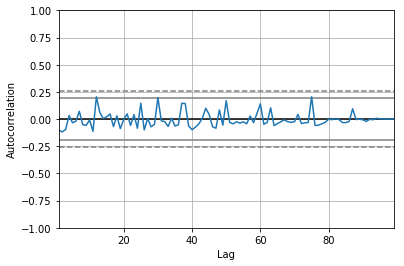

In [93]:
autocorrelation_plot(arima_train);

### Обучим нашу модель 

In [94]:
arima_model = ARIMA(arima_train, order=(0,1,0))
arima_model_fit = arima_model.fit(disp=0)

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a n

### Параметры нашей модели 

In [95]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.ACTUAL   No. Observations:                   98
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -10.671
Method:                           css   S.D. of innovations              0.270
Date:                Sat, 19 Jan 2019   AIC                             25.342
Time:                        20:40:21   BIC                             30.512
Sample:                             1   HQIC                            27.433
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.027     -0.049      0.961      -0.055       0.052
==============================================================================
"""

### Выведем график остаточных ошибок 

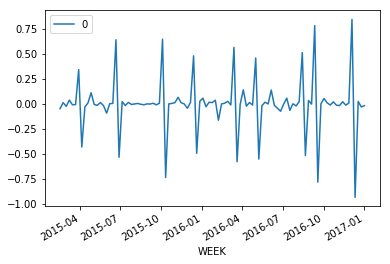

In [96]:
residuals = pd.DataFrame(arima_model_fit.resid)
residuals.plot();

### График плотности значений остаточных ошибок, предполагая, что ошибки являются гауссовыми

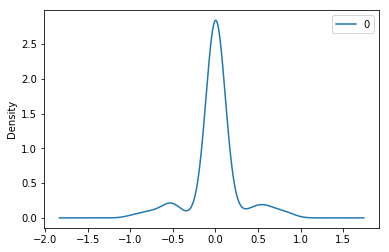

In [97]:
residuals.plot(kind='kde');

### Теперь сделаем прогноз 

In [132]:
train = arima_train.values
test = arima_test.values
new_train = [x for x in train]
prediction = []
for i in range(len(test)):
    arima_model = ARIMA(new_train, order=(0,1,0))
    arima_model_fit = arima_model.fit(disp=0)
    pred = arima_model_fit.forecast()
    prediction.append(pred[0])
    new_train.append(test[i])
    print('предсказанное=%f, ожидаемое=%f' % (pred[0], test[i]))

/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

предсказанное=0.032854, ожидаемое=0.034194
предсказанное=0.032868, ожидаемое=0.026329
предсказанное=0.024938, ожидаемое=0.036758
предсказанное=0.035484, ожидаемое=0.686613
предсказанное=0.691722, ожидаемое=0.106514
предсказанное=0.105941, ожидаемое=0.115575
предсказанное=0.115095, ожидаемое=0.122927
предсказанное=0.122522, ожидаемое=0.102582
предсказанное=0.101988, ожидаемое=0.249786
предсказанное=0.250574, ожидаемое=0.232860
предсказанное=0.233484, ожидаемое=0.219012
предсказанное=0.219503, ожидаемое=0.320055
предсказанное=0.321460, ожидаемое=0.173705
предсказанное=0.173779, ожидаемое=0.195589
предсказанное=0.195858, ожидаемое=0.171653
предсказанное=0.171708, ожидаемое=0.181057
предсказанное=0.181193, ожидаемое=0.181228
предсказанное=0.181364, ожидаемое=0.285348
предсказанное=0.286381, ожидаемое=0.210976
предсказанное=0.211365, ожидаемое=0.211489
предсказанное=0.211879, ожидаемое=0.199863
предсказанное=0.200152, ожидаемое=0.231835
предсказанное=0.232387, ожидаемое=0.076081
предсказанн

### Среднеквадратическая ошибка 

In [133]:
mean_squared_error(test, prediction)

0.044552621675615176

### Графики ожидаемого и предсказанного 

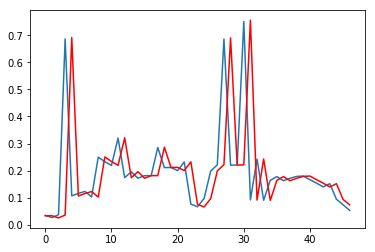

In [134]:
plt.plot(test);
plt.plot(prediction, color='red');

### Предсказание оказалось достаточно хорошим 

### Проделаем теперь тоже самое, но для прогноза на новый год (на 52 недели)

In [135]:
new_arima = [x for x in arima_df.values]
prediction = []
for i in range(52):
    arima_model = ARIMA(new_arima, order=(0,1,0))
    arima_model_fit = arima_model.fit(disp=0)
    pred = arima_model_fit.forecast()
    prediction.append(pred[0])
    new_arima.append(pred[0])

/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

### Выведем предсказания 

In [136]:
prediction

[array([0.05204712]),
 array([0.0512647]),
 array([0.05048227]),
 array([0.04969985]),
 array([0.04891743]),
 array([0.048135]),
 array([0.04735258]),
 array([0.04657015]),
 array([0.04578773]),
 array([0.04500531]),
 array([0.04422288]),
 array([0.04344046]),
 array([0.04265803]),
 array([0.04187561]),
 array([0.04109319]),
 array([0.04031076]),
 array([0.03952834]),
 array([0.03874592]),
 array([0.03796349]),
 array([0.03718107]),
 array([0.03639864]),
 array([0.03561622]),
 array([0.03483379]),
 array([0.03405137]),
 array([0.03326895]),
 array([0.03248652]),
 array([0.0317041]),
 array([0.03092167]),
 array([0.03013925]),
 array([0.02935683]),
 array([0.0285744]),
 array([0.02779198]),
 array([0.02700955]),
 array([0.02622713]),
 array([0.0254447]),
 array([0.02466228]),
 array([0.02387986]),
 array([0.02309743]),
 array([0.02231501]),
 array([0.02153258]),
 array([0.02075016]),
 array([0.01996773]),
 array([0.01918531]),
 array([0.01840289]),
 array([0.01762046]),
 array([0.016838

### График предсказаний 

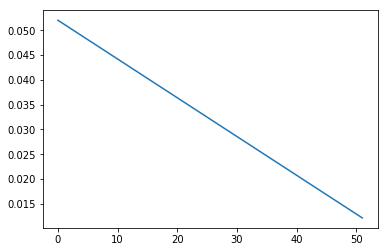

In [137]:
plt.plot(prediction);

## Прогноз при помощи Simple Exponential Smoothing

###  Метод простого экспоненциального сглаживания (SES) моделирует следующий временной шаг как экспоненциально взвешенную линейную функцию наблюдений на предыдущих временных шагах.

In [189]:
ses_train = df1[['ACTUAL']].copy()[:'2017-01-01']
ses_test = df1[['ACTUAL']].copy()['2017-01-01':]

In [191]:
train = ses_train.values
test = ses_test.values
new_train = [x for x in train]
prediction = []
for i in range(len(test)):
    ses_model = SimpleExpSmoothing(new_train)
    ses_model_fit = ses_model.fit()
    pred = ses_model_fit.forecast(12)
    prediction.append(pred[0])
    new_train.append(test[i])
    print('предсказанное=%f, ожидаемое=%f' % (pred[0], test[i]))

предсказанное=0.146980, ожидаемое=0.034194
предсказанное=0.145852, ожидаемое=0.026329
предсказанное=0.144669, ожидаемое=0.036758
предсказанное=0.143611, ожидаемое=0.686613
предсказанное=0.148883, ожидаемое=0.106514
предсказанное=0.148475, ожидаемое=0.115575
предсказанное=0.148162, ожидаемое=0.122927
предсказанное=0.147924, ожидаемое=0.102582
предсказанное=0.147500, ожидаемое=0.249786
предсказанное=0.148447, ожидаемое=0.232860
предсказанное=0.149222, ожидаемое=0.219012
предсказанное=0.149856, ожидаемое=0.320055
предсказанное=0.151390, ожидаемое=0.173705
предсказанное=0.151589, ожидаемое=0.195589
предсказанное=0.151978, ожидаемое=0.171653
предсказанное=0.152151, ожидаемое=0.181057
предсказанное=0.152402, ожидаемое=0.181228
предсказанное=0.152651, ожидаемое=0.285348
предсказанное=0.153785, ожидаемое=0.210976
предсказанное=0.154269, ожидаемое=0.211489
предсказанное=0.154750, ожидаемое=0.199863
предсказанное=0.155126, ожидаемое=0.231835
предсказанное=0.155760, ожидаемое=0.076081
предсказанн

### Среднеквадратическая ошибка 

In [167]:
mean_squared_error(test, prediction)

0.02414190988070223

### Графики ожидаемого и предсказанного 

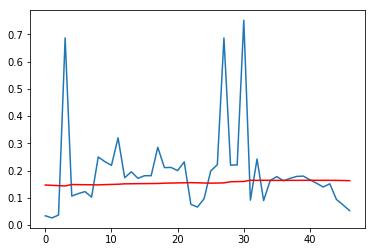

In [192]:
plt.plot(test);
plt.plot(prediction, color='red');

### Сделаем теперь предсказание на новый год 

In [156]:
new_ses = [x for x in df1[['ACTUAL']].copy().values]
prediction = []
for i in range(52):
    ses_model = SimpleExpSmoothing(new_ses)
    ses_model_fit = ses_model.fit()
    pred = ses_model_fit.predict(len(new_ses), len(new_ses))
    prediction.append(pred)
    new_arima.append(pred)

### Выведем предсказания 

In [157]:
prediction

[array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.1630317]),
 array([0.163

### График предсказаний 

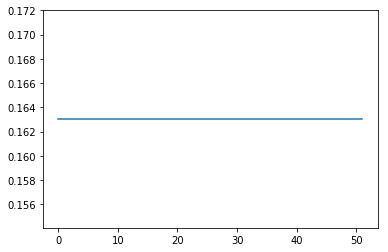

In [158]:
plt.plot(prediction);

### Видно, что модель делает прогноз плохо 

## Посмотрим теперь работу линейной регрессии на этих данных 

### В очередной раз проверим работу на тестовой выборке 

In [171]:
X = df1[['PROMO']].copy()

In [172]:
y = df1[['ACTUAL']].copy()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Обучаем модель 

In [175]:
reg = LinearRegression().fit(X_train, y_train)

### Строим прогноз 

In [176]:
prediction = reg.predict(X_test)

### Среднеквадратическая ошибка 

In [182]:
mean_squared_error(np.asarray(y_test), prediction)

0.04534889320792337

### Выводим графики ожидаемого и предсказанного 

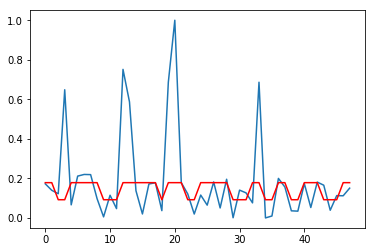

In [181]:
plt.plot(np.asarray(y_test));
plt.plot(prediction, color='red');

### Видно из графика, что модель достаточно хорошо предсказывает увеличение продаж во время акций, однако не может точно предсказать на сколько они вырастут

### Сделаем прогноз на следующий год 

In [185]:
fut_first_prod1.set_index('WEEK', inplace=True)

In [183]:
reg = LinearRegression().fit(X, y)

In [186]:
prediction = reg.predict(fut_first_prod1)

In [187]:
prediction

array([[0.09456003],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.09456003],
       [0.09456003],
       [0.09456003],
       [0.09456003],
       [0.09456003],
       [0.19798078],
       [0.09456003],
       [0.09456003],
       [0.19798078],
       [0.19798078],
       [0.19798078],
       [0.197

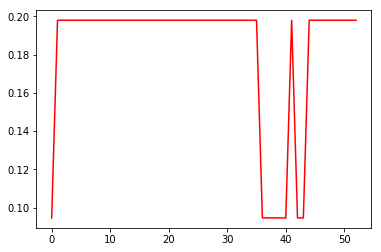

In [188]:
plt.plot(prediction, color='red');